# Logistic Regression

So far we have been modelling $E[y|\mathbf{x}]$ through a multiple linear regression model, i.e., $E[y|\mathbf{x}]=\mathbf{x}^\prime\boldsymbol{\beta}$. When $y\in\{0,1\}$, the left-hand side of this equality becomes
$$
\begin{aligned}
E[y|\mathbf{x}]&=1\times\Pr\{y=1|\mathbf{x}\}+0\times(1-\Pr\{y=1|\mathbf{x}\})\\
&=\Pr\{y=1|\mathbf{x}\}.
\end{aligned}
$$
<ins>Linear Probability Model</ins>: If we stick to a multiple linear regression model one has

$$
\Pr\{y=1|\mathbf{x}\}=\mathbf{x}^\prime\boldsymbol{\beta}.
$$

⚠️ The $\Pr\{y=1|\mathbf{x}\}$ is not necessarily bounded between 0 and 1 as $\mathbf{x}^\prime\boldsymbol{\beta}$ moves from $-\infty$ to $+\infty$.

<ins>Logistic Model</ins>: If we were to put the 'index' $\mathbf{x}^\prime\boldsymbol{\beta}$ inside the [standard logistic function](https://en.wikipedia.org/wiki/Logistic_function) $\Lambda(u)=[1+\exp{(-u)}]^{-1}$ and set

$$
\Pr\{y=1|\mathbf{x}\}=\Lambda(\mathbf{x}^\prime\boldsymbol{\beta}),
$$

this is known as the *Logistic Link Regression*

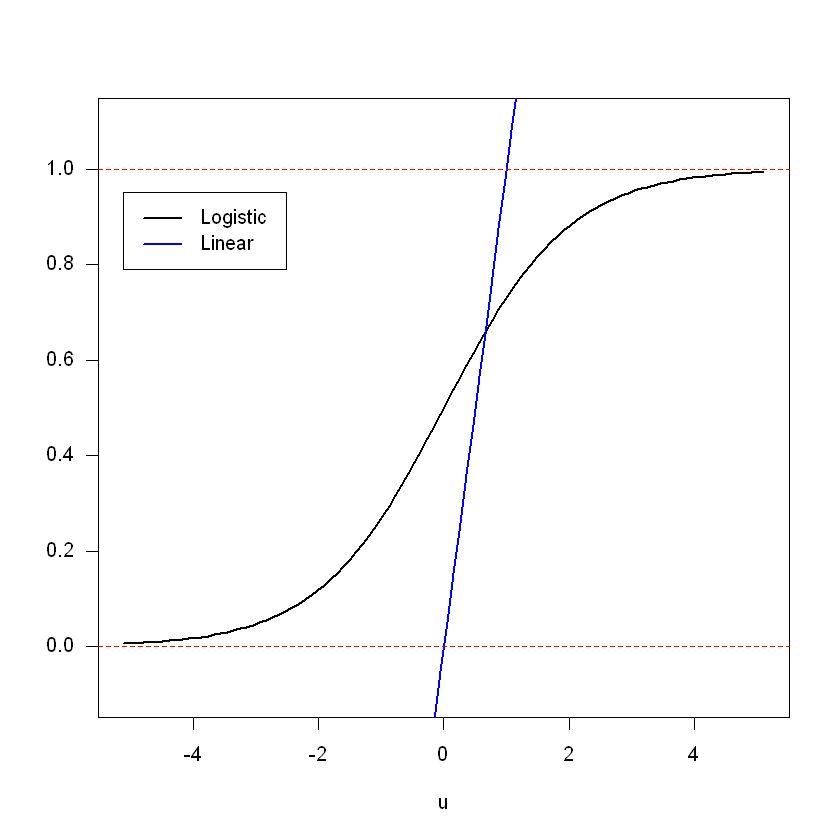

In [1]:
u <- seq(-5.10,5.10,length=100)
plot(u,1/(1+exp(-u)),ylim=c(-0.10,1.10),
     xlab="u",ylab="",type="l",lty=1,col="black",
     las=1,lwd=2.1)
lines(u,u,col="blue",lwd=2.1)
abline(h=0,lty=2,col="red")
abline(h=1,lty=2,col="red")
legend(-5.10, 0.95, legend=c("Logistic", "Linear"),
       col=c("black", "blue"), lty=1, lwd=2.1)

Simple manipulations shows that

$$
\begin{aligned}
\Pr\{y=1|\mathbf{x}\}&=\Lambda(\mathbf{x}^\prime\boldsymbol{\beta})=\frac{1}{1+\exp{(-\mathbf{x}^\prime\boldsymbol{\beta})}}\\
&=\frac{\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}}{1+\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}},\\
1-\Pr\{y=1|\mathbf{x}\}&=\frac{1}{1+\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}}\text{, and therefore}\\
\frac{\Pr\{y=1|\mathbf{x}\}}{1-\Pr\{y=1|\mathbf{x}\}}&=\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}.\\
\log{\left(\frac{\Pr\{y=1|\mathbf{x}\}}{1-\Pr\{y=1|\mathbf{x}\}}\right)}&=\mathbf{x}^\prime\boldsymbol{\beta}.
\end{aligned}
$$

If we define $\Pr\{y=1|\mathbf{x}\}=p(\mathbf{x})$ as the probability of 'success,' then $p(\mathbf{x})/[1-p(\mathbf{x})]$ is called the [*odds*](https://en.wikipedia.org/wiki/Logit), and can take on *any* value between 0 and $\infty$. Similarly the log of the odds is called the *log-odds* or *logit*.

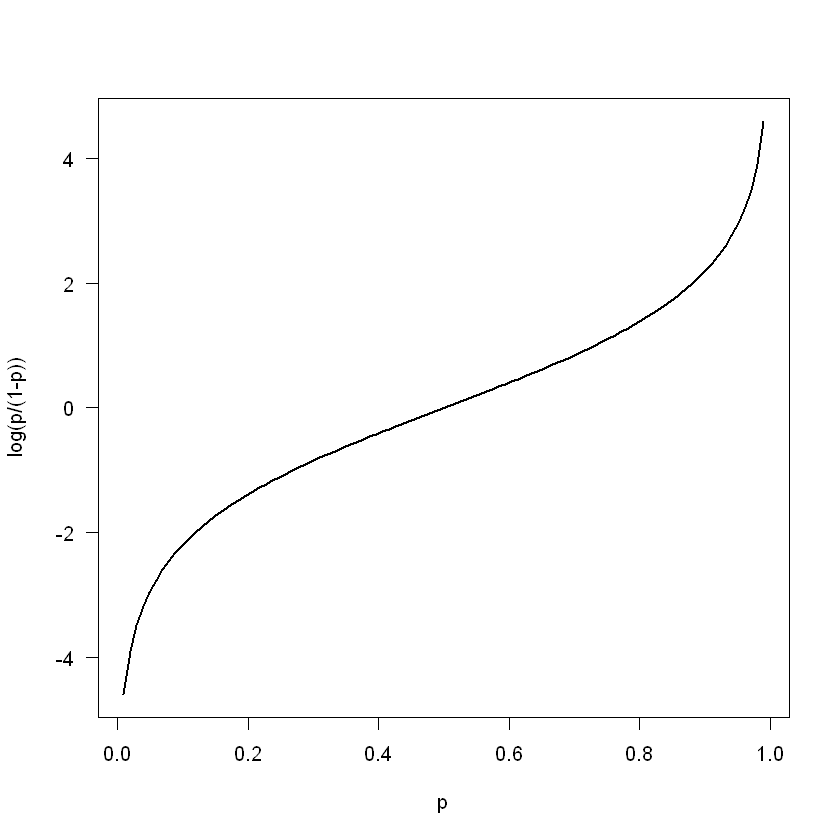

In [2]:
p <- seq(0.01,0.99,length=100)
plot(p,log(p/(1-p)),ylab="log(p/(1-p))",
     xlab="p",type="l",lty=1,col="black",
     las=1,lwd=2.1)

<ins>Example</ins>: If the probability of success is 0.8, i.e., $p(\mathbf{x})=0.8$, then the odds equal $\frac{0.8}{1-0.8}=4$ and one says that the odds of success is 4 to 1. Similarly if the probability of success is 0.5, i.e. $p(\mathbf{x})=0.5$, then the odds equal $\frac{0.5}{1-0.5}=1$ and we say that the odds of success is 1 to 1 in this case.

**Note**: The parameter $\beta_j$ represents how an increase of one unit of $x_j$ on average changes the *log-odds*, or equivalently $\exp{(\beta_j)}$ represents how an incrase of one unit of $x_j$ on average changes the *odds*.

💻 We are going to model female labor force participation decision based on various household characteristics.

In [ ]:
## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

data(mroz)

##  Obs:   753

##  1. inlf                     =1 if in labor force, 1975
##  2. hours                    hours worked, 1975
##  3. kidslt6                  # kids < 6 years
##  4. kidsge6                  # kids 6-18
##  5. age                      woman's age in yrs
##  6. educ                     years of schooling
##  7. wage                     estimated wage from earns., hours
##  8. repwage                  reported wage at interview in 1976
##  9. hushrs                   hours worked by husband, 1975
## 10. husage                   husband's age
## 11. huseduc                  husband's years of schooling
## 12. huswage                  husband's hourly wage, 1975
## 13. faminc                   family income, 1975
## 14. mtr                      fed. marginal tax rate facing woman
## 15. motheduc                 mother's years of schooling
## 16. fatheduc                 father's years of schooling
## 17. unem                     unem. rate in county of resid.
## 18. city                     =1 if live in SMSA (Standard Metropolitan Statistical Area)
## 19. exper                    actual labor mkt exper
## 20. nwifeinc                 (faminc - wage*hours)/1000
## 21. lwage                    log(wage)
## 22. expersq                  exper^2

## specifying the outcome variable (y) and original predictors (X)
outcome <- "inlf"
predictors <- c("kidslt6", "kidsge6", "age", "educ","exper", "hushrs", "husage", "huseduc","huswage", 
    "nwifeinc","mtr","unem","city")

## creating local copy with relevant variables
data("mroz", package = "wooldridge")
mroz.copy <- subset(mroz, select = c(outcome, predictors))

head(mroz.copy,10)

💻 The following set of commands will *add* **all** possible demeaned cross-products among features excluding ```city``` to the ```mroz.copy```

In [ ]:
## installing the 'tidyverse' package if not previously installed
if (!require(tidyverse)) install.packages('tidyverse')

## installing the 'caret' package if not previously installed
if (!require(caret)) install.packages('caret')

## installing the 'MLmetrics' package if not previously installed
if (!require(MLmetrics)) install.packages("MLmetrics")
library(MLmetrics)

## demeaning all predictors, renaming them and saving their variable names
x <- scale(model.matrix(inlf ~ .-city, mroz.copy)[, -1], center = TRUE, scale = FALSE)
colnames(x) <- paste("d_", colnames(x), sep = "")
drops <- colnames(x)

## attaching the demeaned predictors to a copy of the original data set
mroz.copy <- cbind(mroz.copy, x)

d.predictors <- paste('(',paste(drops, collapse = "+"),')^2',sep="")
xx <- model.matrix(lm(as.formula(paste0(outcome, "~", d.predictors)),data=mroz.copy))[,-1]

mroz.copy <- cbind(mroz.copy[, !(colnames(mroz.copy) %in% drops)],xx[,!(colnames(xx) %in% drops)])
colnames(mroz.copy)

💻 We now partition the augmented data set into the ```train.data``` (75% of the original observations) and ```test.data``` (25% of the original observations).

In [ ]:
## split the data into training and test set
set.seed(2020)
training.samples <- mroz.copy$inlf %>% 
  createDataPartition(p = 0.75, list = FALSE)
train.data  <- mroz.copy[training.samples, ]
test.data <- mroz.copy[-training.samples, ]

## printing the response variable for the training set
set.seed(2020)
sample(train.data$inlf)

## Estimating the Regression Coefficients

Firstly remember that if we have a *random sample*, then the joint probability of observing the sequence of $n$ ones and zeroes above is given by

$$
\begin{aligned}
&(1-p(\mathbf{x}_1))\cdot p(\mathbf{x}_2)\cdot (1-p(\mathbf{x}_3)\cdot p(\mathbf{x}_4)\cdot p(\mathbf{x}_5)\ldots\\
& = \prod_{i=1}^{n} p(\mathbf{x}_i)^{y_i}[1-p(\mathbf{x}_i)]^{1-y_i}\\
& = \prod_{i=1}^{n} \Lambda(\mathbf{x}_i^\prime\boldsymbol{\beta})^{y_i}[1-\Lambda(\mathbf{x}_i^\prime\boldsymbol{\beta})]^{1-y_i}\\
&=L(\boldsymbol{\beta}|y_1,\ldots,y_n;\mathbf{x}_1,\ldots,\mathbf{x}_n)\\
&=:L_n(\boldsymbol{\beta}).
\end{aligned}
$$

The function $L_n(\boldsymbol{\beta})$ is called the [*likelihood function*](https://en.wikipedia.org/wiki/Likelihood_function) and if we take the natural logarithm, i.e.,

$$\ell_n(\boldsymbol{\beta})=\log{L_n(\boldsymbol{\beta})}$$

is called the *log-likelihood function*. Therefore, we can estimate $\boldsymbol{\beta}$ by maximizing the *log-likelihood function* as this equivalent as to finding the $\boldsymbol{\beta}$ that maximizes the joint probability to observe the sample we have, i.e., $\widehat{\boldsymbol{\beta}}=\underset{\mathbf{b}}{\text{arg max }} \ell_n(\mathbf{b})$.

💻 We start by estimating the base model, i.e, $\mathbf{x}$=(1,```kidslt6```,```kidsge6```,```age```,```educ```,```exper```,```hushrs```,```husage```,```huseduc```,```huswage```,```nwifeinc```,```mtr```,```unem```,```city```)$^\prime$.

In [ ]:
## fit the model
b.predictors <- paste(predictors,collapse = "+")
model <- glm( as.formula(paste0(outcome, "~", b.predictors)), data = train.data, family = binomial)

## printing the exp() of the model estimated coefficients
exp(coef(model))

### [Interpreting the Logit Coefficients](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)

💻 Holding everything else constant, one extra year of ```educ``` will make the odds of a woman to be working for wages to be 28.324% higher. The odds of a woman working for wages in a ```city``` is 1.029 times that if she were to live in a rural area (non-SMSA) instead. Having 1 extra ```kidslt6``` will reduce the odds of a woman to be working for wages by a factor of 0.266.

### Predicted Probabilities

💻 Once we have obtained $\widehat{\boldsymbol{\beta}}$ from the ```train.data``` set we can plug-in the features in the ```test.data``` set and calculate the predicted probabilities to be in the labor force for observations in the validation set. If the predicted probability for observation $j$ in the validaton set is above 0.5 we can predict a 'success,' i.e., $\widehat{y}_j=1$ and $\widehat{y}_j=0$ otherwise. Since we *do* observe the actual outcome for said observation, i.e., $y_j$ we can count how many times our model predicted the correct outcome, and apply [McNemar's test](https://en.wikipedia.org/wiki/McNemar%27s_test) to the resulting contingency table.

In [ ]:
## making predictions
probabilities <- model %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)

## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

In [ ]:
theme_set(theme_bw())

xb <- predict(model, type = "link")

data.frame(train.data,xb=xb) %>%
      ggplot(aes(xb, inlf)) +
      geom_point(alpha = 0.2) +
      geom_smooth(method = "glm", method.args = list(family = "binomial")) +
      labs(
        title = "Logistic Regression Model", 
        x = bquote(x  * hat(beta)),
        y = "Probability of being in-labor-force"
        )

## _Elastic Net_

💻 Now assume that we are interested in fitting a model with a larger set of features, like the one that contains the initial features in the base model *plus* all possible cross-products of the demeaned features excluding ```city```.

In [ ]:
## for high-dimensional estimation
if (!require(glmnet)) install.packages("glmnet")
library(glmnet)

## creating the feature matrix & outcome for the train data
x.train <- as.matrix(train.data[,-1])
y.train <- train.data$inlf

## creating the response variable for the train data
x.test <- as.matrix(test.data[,-1])
y.test <- test.data$inlf

colnames(train.data[,-1])

In this case we can implement the Elastic Net regression as explained before, i.e.,
$$
\widehat{\boldsymbol{\beta}}=\underset{\mathbf{b}}{\text{arg min }} -\ell_n(\mathbf{b}) +\lambda\left((1-\alpha)\|\mathbf{b}\|_{2}^{2}+\alpha\|\mathbf{b}\|_{1}\right).
$$

In [ ]:
set.seed(24)
cv.lasso <- cv.glmnet(x.train, y.train,, nfolds = 10, alpha = 1, family = "binomial")
plot(cv.lasso)

cv.lasso$lambda.min

In [ ]:
coef(cv.lasso, cv.lasso$lambda.min)

In [ ]:
# final model with optimal lambda
lasso.model <- glmnet(x.train, y.train, alpha = 1, family = "binomial",
                      lambda = cv.lasso$lambda.min)
probabilities <- lasso.model %>% predict(newx = x.test)
predicted.classes <- ifelse(probabilities > 0.5, "1", "0")

## assessing model accuracy
confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
                reference = factor(predicted.classes,labels=c("no","yes")))

In [ ]:
## setting up a grid range of lambda values
#lambda <- seq(0.009,0.011,length=10)

## LASSO: building the model using 10-fold CV repeated 5 times
#set.seed(2020)
#lasso <- train(inlf ~ ., data = data.frame(inlf = factor(train.data$inlf,labels=c("no","yes")), train.data[,-1]), method = "glmnet", 
#    trControl = trainControl("repeatedcv",number = 10,repeats=5,verboseIter = F,summaryFunction = twoClassSummary,classProbs = T), tuneGrid = expand.grid(alpha = 1, 
#        lambda = lambda),family="binomial",metric="ROC")


## LASSO: model coefficients
#coef(lasso$finalModel, lasso$bestTune$lambda)

## LASSO: making predictions
#probabilities <- lasso %>% predict(data.frame(lprice = factor(test.data$inlf,labels=c("no","yes")), test.data[,-1]))

# Model accuracy rate
#confusionMatrix(data = factor(test.data$inlf,labels=c("no","yes")),
#                reference = factor(probabilities,labels=c("no","yes")))